In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas import crosstab
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import minmax_scale

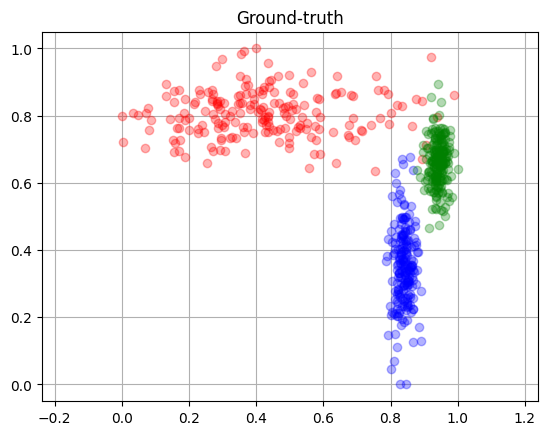

In [2]:
def plotblobs(X,y,n_clusters):
    cor = ['red','blue','green']
    for k in range(n_clusters):
        idx = np.where(y==k)
        ax.scatter(X[idx,0],X[idx,1],c=cor[k],zorder=3,
                marker='o',alpha=0.3)
    ax.axis('equal')
    ax.grid(visible=True,zorder=1)
    
    
np.random.seed(91)
n_clusters = 3
n_samples = 600

[X,y] = make_blobs(n_samples = n_samples, n_features=2, 
                   centers = [[-2,3],[0,0],[.5,2]], 
                   cluster_std = [[1,.5],[.1,.8],[.1,.5]])

X = minmax_scale(X,feature_range=(0,1))

ax = plt.axes()
plotblobs(X,y,n_clusters)
ax.set(title='Ground-truth');

In [3]:
np.random.seed(911)

max_iterations = 1000

tol = 1e-8 

# stop criterion
# 0 - Norm of medoids
# 1 - Decreasing cost 
stop_criterion = 1

# random initial medoids
medoids = np.random.permutation(n_samples)[:n_clusters]
initial_medoids = np.copy(medoids) 

In [4]:

cost = []
for i in range(max_iterations): 

    oldl2norm = np.linalg.norm(X[medoids])
    d2m = pairwise_distances(X, X[medoids])
    kmedoids_cluster = np.argmin(d2m,axis=1)

    cost.append(0)   
    for k in range(n_clusters):

        idx_cluster_samples = np.where(kmedoids_cluster==k)[0]
        p2p = pairwise_distances(X[idx_cluster_samples])

        intra_cluster_dispersion = np.sum(p2p,axis=1)
        idx = np.argmin(intra_cluster_dispersion)
    
        cost[i] = cost[i] + intra_cluster_dispersion[idx]
    
        medoids[k] = idx_cluster_samples[idx]
    
    newl2norm = np.linalg.norm(X[medoids])

    if(stop_criterion==1):
        if((abs(oldl2norm-newl2norm)/oldl2norm)<tol):
            break
    else:
        if(cost[i]>=cost[i-1]):
            break
             

Text(0, 0.5, 'Cost')

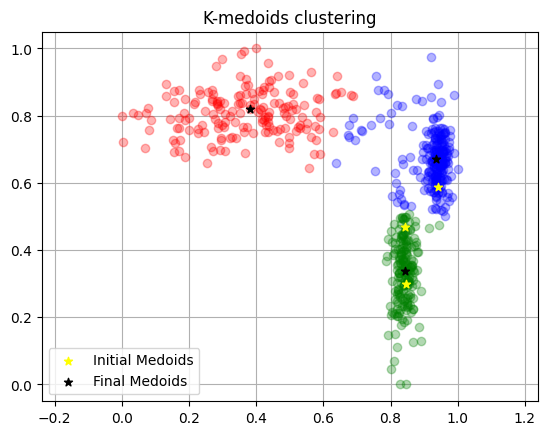

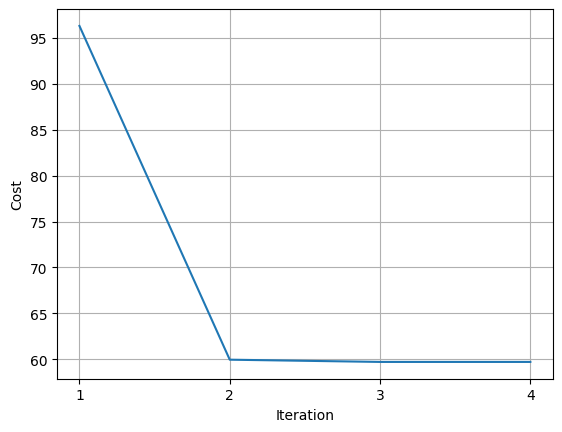

In [6]:
plt.figure()
ax = plt.axes()
plotblobs(X,kmedoids_cluster,n_clusters)

# plots initial and final medoids
ax.scatter(X[initial_medoids,0],X[initial_medoids,1],marker='*',c='yellow',zorder=4, label='Initial Medoids')
ax.scatter(X[medoids,0],X[medoids,1],marker='*',c='black',zorder=4, label='Final Medoids')
ax.legend(loc='lower left')
ax.set(title='K-medoids clustering')

plt.figure()
plt.plot(cost)
plt.grid(visible=True)
plt.xlabel('Iteration')
L = list(range(i+1))
rotulos = L+np.ones([1,len(L)])
plt.xticks(ticks=L,labels=[int(k) for k in list(rotulos[0])])
plt.ylabel('Cost')

In [ ]:
# matplotlib defaults
from google.colab import drive
drive.mount('/content/drive')

cara = pd.read_csv('/content/drive/MyDrive/UniTS/CodeProjects/Unsupervised_Learning/data/cara.csv')
cara

In [7]:
file_path = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/seasonal_rainfall_agg.csv'
rainfall = pd.read_csv(file_path)
rainfall

,Unnamed: 0,loc_id,latitude,longitude,MAM,JJA,SON
0,0,0,3.0,33.0,27.610630,31.365070,24.972204
1,1,1,3.0,33.5,26.281088,31.178913,20.268501
2,2,2,3.0,34.0,23.993891,29.477806,16.252021
3,3,3,3.0,34.5,21.138449,24.985073,13.394888
4,4,4,3.0,35.0,16.771113,17.162890,9.135349
...,...,...,...,...,...,...,...
770,770,770,15.0,46.0,2.395008,1.058037,0.294778
771,771,771,15.0,46.5,1.472659,1.153102,0.325222
772,772,772,15.0,47.0,1.785098,3.216337,1.181444
773,773,773,15.0,47.5,2.379334,3.724557,1.564208


In [64]:
k = 5
data = [rainfall[['MAM',	'JJA',	'SON']].to_numpy()]
data[0]

array([[27.61062975, 31.36506962, 24.97220417],
       [26.28108839, 31.17891322, 20.26850124],
       [23.99389081, 29.47780615, 16.25202081],
       ...,
       [ 1.78509811,  3.21633744,  1.18144356],
       [ 2.37933396,  3.72455661,  1.56420838],
       [ 2.80079459,  4.59963551,  2.51516057]])

In [65]:
data[0] = data[0] - np.mean(data[0],axis=0) 

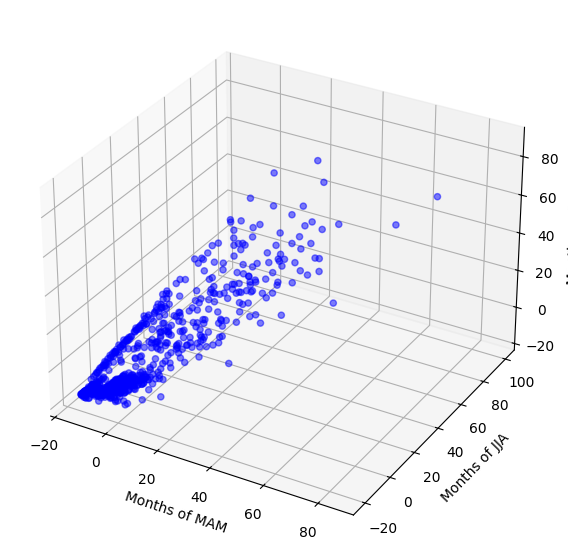

In [67]:
#plt.scatter(data[:,0], data[:,1], marker=".", s=10, linewidths=3)

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0][:,0] , data[0][:,1] , data[0][:,2] , s = 20 , color = 'blue', alpha=0.5)

ax.set_xlabel('Months of MAM')
ax.set_ylabel('Months of JJA')
ax.set_zlabel('Months of SON')
plt.show()

In [68]:
def euclidean_dist(A, B):
      return np.sum((A - B)**2)**0.5

def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j[0,0]))

    colors = 10*["g","r","c","b","k"]

    ## Data
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker=".", color=colors[i], s=10, linewidths=3)
        j+=1

    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="x", color="k", s=50, linewidths=2)

    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="o", color="DarkBlue", s=50, linewidths=1)

In [69]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data
        self.centeriod_init = centeriod_init

    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'):
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
            
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids

    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))

        cents = self.initialise_centroids(self.centeriod_init,self.k,data)

        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0

        while changed and num_iter<100:
            changed = False
            
            # for each row in the dataset
            for i in range(m):
                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1
                #calculate distance
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index:
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)

            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig

In [70]:
kmeans = K_Means(k=k,data = data,centeriod_init='random')

centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])


index = cluster_assignments[:,0] ## the cluster index
distance = cluster_assignments[:,1]  ## the cluster distance

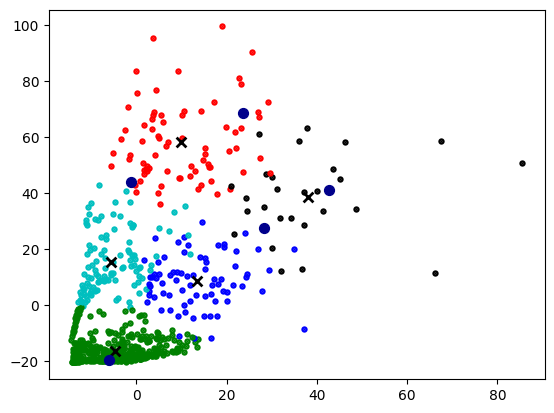

In [71]:
plot(data,k,index,centroids,orig_centroids)

Text(0, 0.5, 'Dispersion')

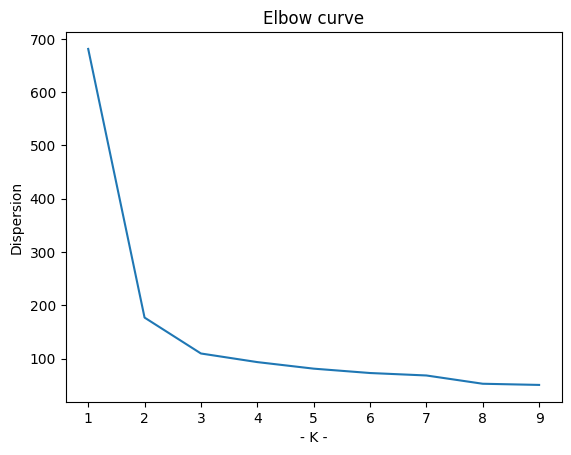

In [72]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    distance = cluster_assignments[:,1]  ## the cluster distances

    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("- K -")
plt.ylabel("Dispersion")

/tmp/ipykernel_7557/1520268167.py:18: RuntimeWarning: invalid value encountered in divide
  s = (dist_ji - a)/max(dist_ji,a)


Text(0, 0.5, 'Dispersion')

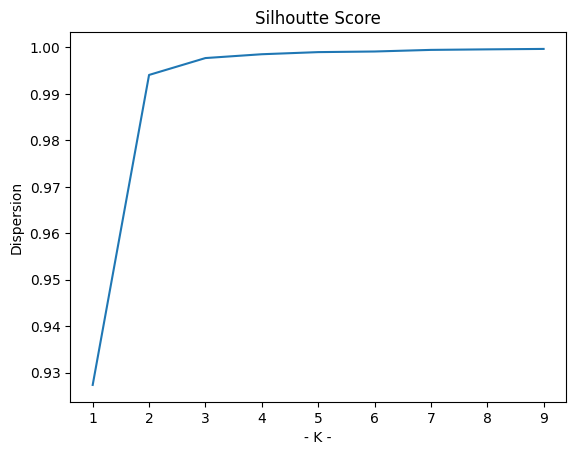

In [73]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = data[0],centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    X = data[0]
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(data[0])):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(data[0])

    a = sum(cluster_assignments[:,1])/(len(data[0])-1)

    if max(dist_ji,a) != 0:
        s = (dist_ji - a)/max(dist_ji,a)
    else:
        s = 0

    s = np.array(s)
    s =  s.item()
    costs.append(s)


x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("- K -")
plt.ylabel("Dispersion")

In [74]:
k = 5

kmeans = K_Means(k=k,data = data,centeriod_init='random')

centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])

index = cluster_assignments[:,0] ## the cluster index
distance = cluster_assignments[:,1]  ## the cluster distance

In [75]:
c_labels = np.array(index)[:,0]
for num in np.unique(c_labels): print(f"Cluster {num}: {sum(c_labels==num)}")

Cluster 0.0: 282
Cluster 1.0: 58
Cluster 2.0: 211
Cluster 3.0: 130
Cluster 4.0: 94


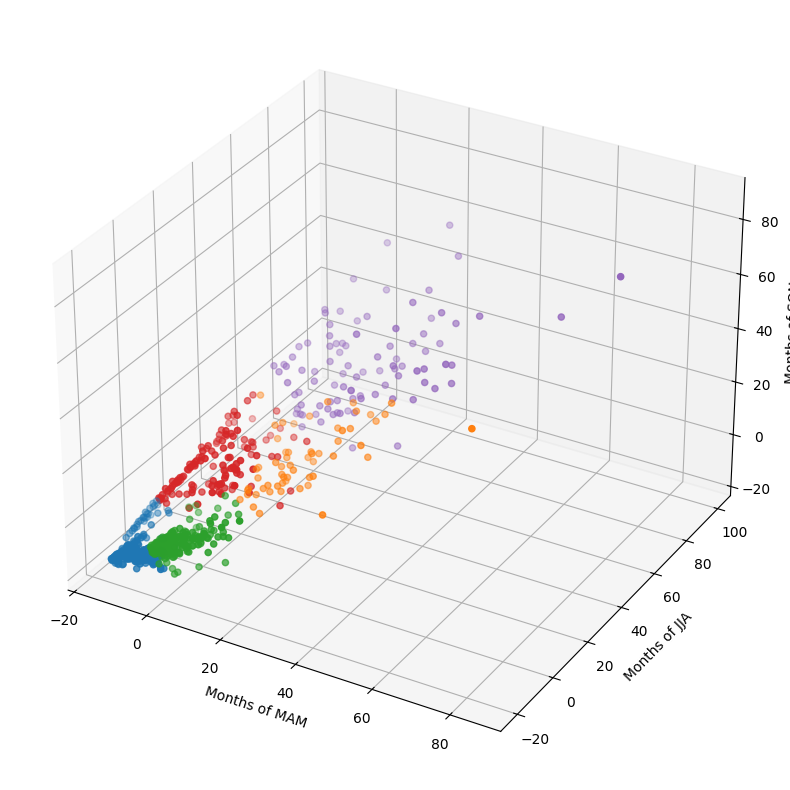

In [76]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

c_labels = np.array(index)[:,0]
for num in np.unique(c_labels): 
    ax.scatter(data[0][c_labels==num,0], data[0][c_labels==num,1], data[0][c_labels==num,2], s = 20 , label = f"Cluster {num}")
 
ax.set_xlabel('Months of MAM')
ax.set_ylabel('Months of JJA')
ax.set_zlabel('Months of SON')
plt.show()